In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

recepten =pd.read_csv('data_nutritions.csv')

# Doel van model
Het doel van ons model is om recepten aan te bevelen die tussen 600 en 875 calorien zitten.

In [8]:
recepten =pd.read_csv('data_nutritions.csv')

# Kolom voor elke onderdeel
voedingsstoffen = ['energie', 'koolhydraten', 'waarvan suikers', 'natrium', 'eiwit', 'vet', 'waarvan verzadigd', 'vezels']

for stof in voedingsstoffen:
    # Een kolom voor elk stof en zetten op waarde 1 als het hetzelfde is als de stof kolom
    recepten[stof] = (recepten['nutrition'] == stof).astype(int)

# Merge de kolommen op basis van de nutriëntnaam
for stof in voedingsstoffen:
    recepten_stof = recepten[recepten['nutrition'] == stof]
    waarde = recepten_stof[['value']]
    waarde.columns = [stof]  # Hernoem de kolom naar de juiste stof
    recepten = recepten.merge(waarde, how='left', left_index=True, right_index=True)

# Verwijder de overige kolommen
recepten = recepten.drop(columns=['nutrition', 'value'])
recepten


,Unnamed: 0,recipe,energie_x,koolhydraten_x,waarvan suikers_x,natrium_x,eiwit_x,vet_x,waarvan verzadigd_x,vezels_x,energie_y,koolhydraten_y,waarvan suikers_y,natrium_y,eiwit_y,vet_y,waarvan verzadigd_y,vezels_y
0,0,Kruidnoten met choco-discodip,1,0,0,0,0,0,0,0,260 kcal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kruidnoten met choco-discodip,0,1,0,0,0,0,0,0,NaN,34 g,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Kruidnoten met choco-discodip,0,0,1,0,0,0,0,0,NaN,NaN,22 g,NaN,NaN,NaN,NaN,NaN
3,3,Kruidnoten met choco-discodip,0,0,0,1,0,0,0,0,NaN,NaN,NaN,200 mg,NaN,NaN,NaN,NaN
4,4,Kruidnoten met choco-discodip,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,3 g,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40911,58755,Ceviche met sint-jakobsschelpen,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0 g,NaN
40912,58761,Biefstuk met rodewijnsaus en ham,1,0,0,0,0,0,0,0,360 kcal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40913,58762,Biefstuk met rodewijnsaus en ham,0,1,0,0,0,0,0,0,NaN,2 g,NaN,NaN,NaN,NaN,NaN,NaN
40914,58763,Biefstuk met rodewijnsaus en ham,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,28 g,NaN,NaN,NaN


In [9]:
agg_functions = {'energie_y': 'sum', 'koolhydraten_y': 'sum', 'waarvan suikers_y': 'sum', 'natrium_y': 'sum','eiwit_y': 'sum','vet_y':'sum', 'waarvan verzadigd_y': 'sum', 'vezels_y': 'sum'} #rijen die behoren tot één recept samenvoegen
nutri = recepten.groupby(recepten['recipe']).aggregate(agg_functions).reset_index() #de index resetten
nutri.loc[nutri["recipe"] == " Bietensoep met selderijroom"] 
nutri

,recipe,energie_y,koolhydraten_y,waarvan suikers_y,natrium_y,eiwit_y,vet_y,waarvan verzadigd_y,vezels_y
0,Bietensoep met selderijroom,160 kcal,11 g,0,1160 mg,3 g,11 g,5 g,5 g
1,Libanese wraps met appel-koolsalade,440 kcal,45 g,0,440 mg,21 g,18 g,3 g,9 g
2,Sticky cauliflower (gegrilde bloemkoolroosjes...,235 kcal,16 g,0,800 mg,8 g,14 g,2 g,6 g
3,Zalmspies met sojaglaze van de BBQ,300 kcal,17 g,0,560 mg,16 g,18 g,3 g,2 g
4,&amp;Suus’ buik-weg-salade,215 kcal,15 g,0,1060 mg,20 g,7 g,2 g,7 g
...,...,...,...,...,...,...,...,...,...
6030,Zweedse gehaktballetjes met room,640 kcal,26 g,0,520 mg,33 g,45 g,22 g,2 g
6031,Zweedse vegaballetjes met aardappel &amp; broc...,770 kcal,76 g,0,1320 mg,38 g,31 g,10 g,17 g
6032,Zwitserse kaasfondue,850 kcal,7 g,5 g,920 mg,56 g,63 g,38 g,0 g
6033,Îles flottantes,290 kcal,49 g,0,125 mg,10 g,6 g,3 g,0


In [10]:
nutri['energie'] = nutri['energie_y'].str.replace(' kcal', '').astype(float)
nutri['koolhydraten'] = nutri['koolhydraten_y'].str.replace(' g', '').astype(float)
nutri['waarvan suikers'] = nutri['waarvan suikers_y'].str.replace(' g', '').astype(float)
nutri['natrium'] = nutri['natrium_y'].str.replace(' mg', '').astype(float)
nutri['eiwit'] = nutri['eiwit_y'].str.replace(' g', '').astype(float)
nutri['vet'] = nutri['vet_y'].str.replace(' g', '').astype(float)
nutri['waarvan verzadigd'] = nutri['waarvan verzadigd_y'].str.replace(' g', '').astype(float)
nutri['vezels'] = nutri['vezels_y'].str.replace(' g', '').astype(float)
nutri.drop(columns=['energie_y','koolhydraten_y','waarvan suikers_y','natrium_y','eiwit_y','vet_y','waarvan verzadigd_y','vezels_y'], inplace = True)
nutri = nutri.fillna(0)
nutri.to_csv('nutri_los.csv', index=False)

In [5]:
nutri['gewenst'] = (nutri['energie'] >= 600) & (nutri['energie'] <= 875)
nutri

,recipe,energie,koolhydraten,waarvan suikers,natrium,eiwit,vet,waarvan verzadigd,vezels,gewenst
0,Bietensoep met selderijroom,160.0,11.0,0.0,1160.0,3.0,11.0,5.0,5.0,False
1,Libanese wraps met appel-koolsalade,440.0,45.0,0.0,440.0,21.0,18.0,3.0,9.0,False
2,Sticky cauliflower (gegrilde bloemkoolroosjes...,235.0,16.0,0.0,800.0,8.0,14.0,2.0,6.0,False
3,Zalmspies met sojaglaze van de BBQ,300.0,17.0,0.0,560.0,16.0,18.0,3.0,2.0,False
4,&amp;Suus’ buik-weg-salade,215.0,15.0,0.0,1060.0,20.0,7.0,2.0,7.0,False
...,...,...,...,...,...,...,...,...,...,...
6030,Zweedse gehaktballetjes met room,640.0,26.0,0.0,520.0,33.0,45.0,22.0,2.0,True
6031,Zweedse vegaballetjes met aardappel &amp; broc...,770.0,76.0,0.0,1320.0,38.0,31.0,10.0,17.0,True
6032,Zwitserse kaasfondue,850.0,7.0,5.0,920.0,56.0,63.0,38.0,0.0,True
6033,Îles flottantes,290.0,49.0,0.0,125.0,10.0,6.0,3.0,0.0,False


In [6]:
nutri = nutri.drop('energie', axis=1)
nutri

,recipe,koolhydraten,waarvan suikers,natrium,eiwit,vet,waarvan verzadigd,vezels,gewenst
0,Bietensoep met selderijroom,11.0,0.0,1160.0,3.0,11.0,5.0,5.0,False
1,Libanese wraps met appel-koolsalade,45.0,0.0,440.0,21.0,18.0,3.0,9.0,False
2,Sticky cauliflower (gegrilde bloemkoolroosjes...,16.0,0.0,800.0,8.0,14.0,2.0,6.0,False
3,Zalmspies met sojaglaze van de BBQ,17.0,0.0,560.0,16.0,18.0,3.0,2.0,False
4,&amp;Suus’ buik-weg-salade,15.0,0.0,1060.0,20.0,7.0,2.0,7.0,False
...,...,...,...,...,...,...,...,...,...
6030,Zweedse gehaktballetjes met room,26.0,0.0,520.0,33.0,45.0,22.0,2.0,True
6031,Zweedse vegaballetjes met aardappel &amp; broc...,76.0,0.0,1320.0,38.0,31.0,10.0,17.0,True
6032,Zwitserse kaasfondue,7.0,5.0,920.0,56.0,63.0,38.0,0.0,True
6033,Îles flottantes,49.0,0.0,125.0,10.0,6.0,3.0,0.0,False


In [7]:
X = nutri[['koolhydraten', 'waarvan suikers', 'natrium', 'eiwit', 
        'vet', 'waarvan verzadigd', 'vezels']]
y = nutri[['gewenst']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LogisticRegression(penalty=None, random_state=42)
y_train = np.reshape(y_train, (-1,))
model = model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_valid_scaled)
print(classification_report(y_valid,y_pred))
print("Accuracy:", metrics.accuracy_score(y_valid,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.96      0.92       835
        True       0.85      0.65      0.74       297

    accuracy                           0.88      1132
   macro avg       0.87      0.81      0.83      1132
weighted avg       0.88      0.88      0.87      1132

Accuracy: 0.8789752650176679


## Decision tree

In [11]:
tree = DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train, y_train)
tree_y_pred = tree.predict(X_valid)
print(classification_report(y_valid, tree_y_pred))
print("Decision Tree Validation Accuracy:", metrics.accuracy_score(y_valid, tree_y_pred))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       835
        True       0.88      0.89      0.89       297

    accuracy                           0.94      1132
   macro avg       0.92      0.92      0.92      1132
weighted avg       0.94      0.94      0.94      1132

Decision Tree Validation Accuracy: 0.9399293286219081


In [12]:
tree2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree2 = tree2.fit(X_train, y_train)
tree2_y_pred = tree2.predict(X_valid)
print(classification_report(y_valid, tree2_y_pred))
print("Accuracy:", metrics.accuracy_score(y_valid, tree2_y_pred))
#By setting a max_depth, you can prevent the tree from growing too complex and reduce overfitting.

              precision    recall  f1-score   support

       False       0.93      0.88      0.90       835
        True       0.70      0.80      0.74       297

    accuracy                           0.86      1132
   macro avg       0.81      0.84      0.82      1132
weighted avg       0.87      0.86      0.86      1132

Accuracy: 0.8560070671378092


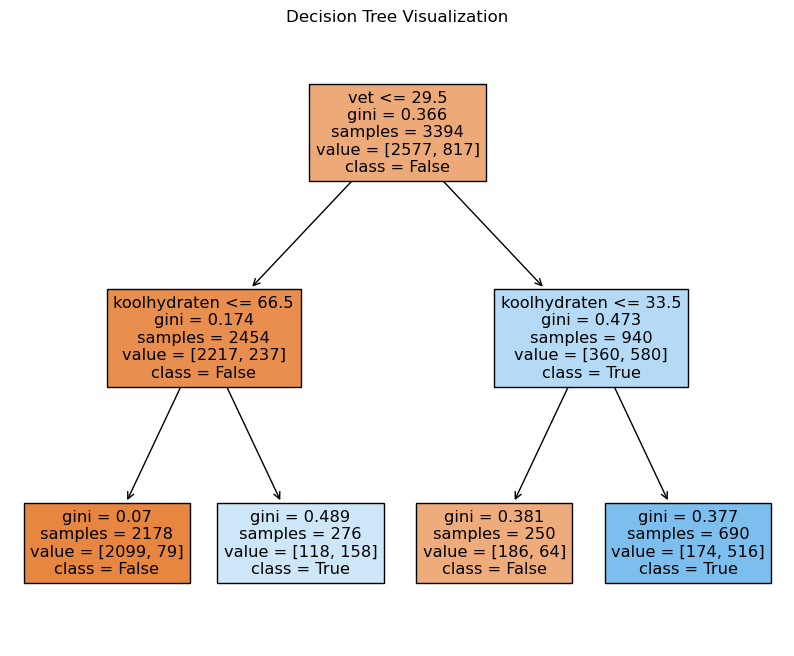

In [13]:
plt.figure(figsize=(10,8))
plot_tree(tree2, feature_names=X_train.columns, filled=True, class_names=['False', 'True'])
plt.title("Decision Tree Visualization")
plt.show()

## Random Forest

In [14]:
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       835
        True       0.92      0.94      0.93       297

    accuracy                           0.96      1132
   macro avg       0.95      0.95      0.95      1132
weighted avg       0.96      0.96      0.96      1132

Accuracy: 0.9628975265017667


## Evaluatie
beste is Random Forest

In [15]:
final_rand_for = RandomForestClassifier(random_state=42)
final_rand_for.fit(X_train, y_train)
y_pred = final_rand_for.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1154
        True       0.91      0.90      0.91       355

    accuracy                           0.96      1509
   macro avg       0.94      0.94      0.94      1509
weighted avg       0.96      0.96      0.96      1509

Accuracy: 0.9569251159708416


In [16]:
joblib.dump(final_rand_for, 'final_model.pkl')
model = joblib.load('final_model.pkl')

In [17]:
data_geheel = nutri.copy()
data_geheel
data_geheel['predictions'] = y_pred
data_geheel

ValueError: Length of values (1509) does not match length of index (6035)

In [66]:
X = data_geheel[['koolhydraten', 'waarvan suikers', 'natrium', 'eiwit', 
        'vet', 'waarvan verzadigd', 'vezels']] 
predict = model.predict(X)
data_geheel['predictions'] = predict
data_geheel

,recipe,koolhydraten,waarvan suikers,natrium,eiwit,vet,waarvan verzadigd,vezels,gewenst,predictions
0,Bietensoep met selderijroom,11.0,0.0,1160.0,3.0,11.0,5.0,5.0,False,False
1,Libanese wraps met appel-koolsalade,45.0,0.0,440.0,21.0,18.0,3.0,9.0,False,False
2,Sticky cauliflower (gegrilde bloemkoolroosjes...,16.0,0.0,800.0,8.0,14.0,2.0,6.0,False,False
3,Zalmspies met sojaglaze van de BBQ,17.0,0.0,560.0,16.0,18.0,3.0,2.0,False,False
4,&amp;Suus’ buik-weg-salade,15.0,0.0,1060.0,20.0,7.0,2.0,7.0,False,False
...,...,...,...,...,...,...,...,...,...,...
6030,Zweedse gehaktballetjes met room,26.0,0.0,520.0,33.0,45.0,22.0,2.0,True,True
6031,Zweedse vegaballetjes met aardappel &amp; broc...,76.0,0.0,1320.0,38.0,31.0,10.0,17.0,True,True
6032,Zwitserse kaasfondue,7.0,5.0,920.0,56.0,63.0,38.0,0.0,True,True
6033,Îles flottantes,49.0,0.0,125.0,10.0,6.0,3.0,0.0,False,False
